# TumorSense: Brain Tumor Classification Project

## Overview
TumorSense is a machine learning project aimed at automating brain tumor detection from medical images using Support Vector Machines (SVM) and Logistic Regression (LR). The project focuses on classifying input images as containing a brain tumor or not. This notebook provides an in-depth exploration of the project's development, methodology, and results.

## Authors
Sarah Pendhari <br>
Karan Pashte

## Data Source
The dataset used for this project has been sourced from [Kaggle](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri). It comprises medical images that are crucial for training and evaluating the models. The dataset includes a diverse set of brain MRI scans, which serve as the foundation for our tumor classification endeavor.

## Algorithms Used
We'll be employing two key machine learning algorithms for this classification task:
- **Support Vector Machines (SVM)**: A powerful classification method that creates a decision boundary to separate tumor and non-tumor images.
- **Logistic Regression (LR)**: A benchmark model for comparison, estimating the probability of binary outcomes based on input features.


### Importing Modules

In this project, we'll be using the specified modules: `numpy`, `pandas`, `matplotlib.pyplot`, `train_test_split` from `sklearn.model_selection`, and `accuracy_score` from `sklearn.metrics`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Importing the Dataset

The dataset used for this project has been sourced from Kaggle. Let's import it in this step.

In [12]:
import os

path = os.listdir(r'D:\MY PC DATA\Desktop\My Projects\TumorSense\Dataset\Training')

classes = {'no_tumor':0, 'pituitary_tumor':1}

In [13]:
classes

{'no_tumor': 0, 'pituitary_tumor': 1}

### Resizing Images

In this step we'll be resizings the image to a square shape of dimensions 200x200 pixels.<br>
The resized image will appended to the X list.<br>
The corresponding label (numeric value from the classes dictionary) will be appended to the Y list.


To leverage image processing techniques, we've used OpenCv. Installing OpenCv and then importing it as:

In [17]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import cv2
X = []
Y = []
for cls in classes:
    pth = r'D:\MY PC DATA\Desktop\My Projects\TumorSense\Dataset\Training\\'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

### Converting Data into Numeric Form

In machine learning, algorithms require numeric data for processing and analysis. However, our image data is in the form of pixel values and cannot be directly used as input for most algorithms. Therefore, we need to preprocess and convert the image data into a suitable numeric representation.

By converting the images into numeric form, we transform each image into a matrix of numerical values. This matrix can be easily fed into machine learning algorithms, allowing us to extract meaningful patterns and relationships that can aid in the classification of brain tumors.

In this step, we'll be preparing our dataset by flattening the images and transforming them into a format that can be efficiently utilized by our chosen algorithms.


In [22]:
X = np.array(X)
Y = np.array(Y)

In [23]:
np.unique(Y) # 0 - No Tumor(Negative), 1 - Tumor(Positive)

array([0, 1])

In [24]:
pd.Series(Y).value_counts()         #Calculating the count of both the categories

1    827
0    395
dtype: int64

### Visualizing Data

In this step, we'll use the Matplotlib library to create visual representations of our preprocessed image data. Visualization plays a crucial role in understanding the characteristics of the dataset, identifying patterns, and gaining insights into the distribution of different classes. Through these visualizations, we aim to enhance our understanding of the data before training our machine learning models.

Let's leverage Matplotlib's powerful plotting capabilities to generate meaningful visualizations that aid us in our brain tumor classification project.


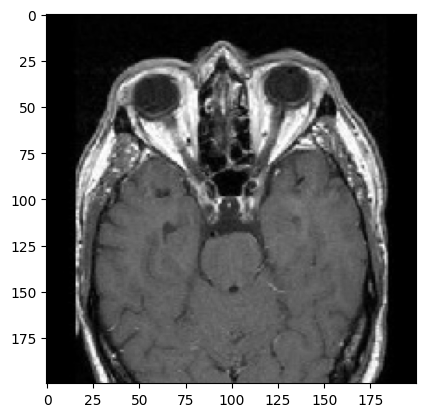

In [31]:
plt.imshow(X[0], cmap='gray')

### Data Preparation

Scikit-learn (sklearn) is a powerful library for machine learning that works with 2-dimensional data (samples × features). However, our image data is in the form of 3-dimensional matrices (height × width × channels). To effectively utilize sklearn's algorithms, we need to reshape our image data from 3D to 2D.

In this step, we'll reshape the image data by flattening each image into a 1D array. This transformation allows us to represent each image as a row in a 2D matrix, where each row corresponds to an image and each column represents a pixel value. By doing so, we can seamlessly continue with feature extraction, model training, and evaluation using sklearn's powerful capabilities.

Let's proceed with reshaping our data to create a compatible format for further machine learning tasks.


In [33]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

### Splitting Data into Training and Testing Sets

To evaluate the performance of our machine learning models, it's essential to divide our dataset into two subsets: a training set and a testing set. We'll be using the `train_test_split` function from scikit-learn to achieve this.

The `train_test_split` function takes our reshaped image data `X_updated` and corresponding labels `Y`, and splits them into four arrays: `xtrain`, `xtest`, `ytrain`, and `ytest`. This division allows us to train our models on one subset and evaluate their performance on another, ensuring that the model's performance generalizes well to new, unseen data.

In the following code snippet, we'll use a random state for reproducibility and set a test size of 20% to allocate a portion of the data for testing. Let's proceed with splitting our data for training and testing.


In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [35]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

The above code snippet shows that there are: <br>
977 samples for training data<br>
245 samples for testing data

### Feature Scaling for Image Data

In machine learning, feature scaling is a preprocessing step that ensures all features (or attributes) are on a similar scale. For image data, feature scaling can be important because pixel values often have different ranges. In our case, the RGB values of an image range from 0 to 255.

To normalize our image data and bring it to a consistent scale, we've opted to use feature scaling. By dividing all pixel values by 255, we effectively transform the range of values to lie between 0 and 1. This normalization process aids in improving the convergence and performance of machine learning algorithms.

In this code snippet, we're applying feature scaling to both the training and testing sets. By dividing each pixel value by 255, we're ensuring that our inputs are within a suitable range for our models. Let's take a look at the resulting range of values after the scaling.


In [36]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [37]:
from sklearn.decomposition import PCA

The line `from sklearn.decomposition import PCA` imports the PCA (Principal Component Analysis) module from scikit-learn, which is used for dimensionality reduction and feature extraction in machine learning pipelines.

The 0.98 creates an instance of the PCA class with a parameter 0.98, which indicates that PCA should retain 98% of the variance in the data during dimensionality reduction

In [38]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98) 
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest


(977, 40000) (245, 40000)


### Training Model

When training a machine learning model, the `C` parameter is a crucial hyperparameter that determines the balance between fitting the training data well and avoiding overfitting. In the context of algorithms like SVM (Support Vector Machines), a high value of `C` indicates a high degree of trust in the training data, aiming to closely fit the data points. Conversely, a low `C` value suggests that the training data might not be fully representative of real-world data, encouraging the model to generalize better to new, unseen data.

In simpler terms, a high `C` value can result in a model that is more prone to overfitting, while a low `C` value promotes a model that prioritizes generalization and robustness.

Remember, the choice of `C` depends on the characteristics of your dataset and your desire to balance between fitting the training data closely and preventing overfitting.


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

The line of code below trains a Support Vector Classifier (SVC) model using the PCA-transformed training data (`pca_train`) and their corresponding labels (`ytrain`).

In [42]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

The line of code below trains a Logistic Regression model with a regularization parameter `C` set to 0.1, using the PCA-transformed training data (`pca_train`) and their corresponding labels (`ytrain`).

In [43]:
lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

### Evaluation of Both SVM and LR

Let's compare the accuracies of both the algorithms

In [45]:
print("SVM Training Score:", sv.score(pca_train, ytrain))
print("SVM Testing Score:", sv.score(pca_test, ytest))

SVM Training Score: 0.9938587512794268
SVM Testing Score: 0.963265306122449


In [46]:
print("LR Training Score:", lg.score(pca_train, ytrain))
print("LR Testing Score:", lg.score(pca_test, ytest))

LR Training Score: 1.0
LR Testing Score: 0.9591836734693877


### Prediction

The line `pred = sv.predict(pca_test)` predicts class labels for the test data using the trained Support Vector Classifier (SVC) model.<br><br>
The line `np.where(ytest!=pred)` is used to find the indices where the predicted class labels (pred) do not match the actual class labels (ytest). This helps identify instances where the model's predictions are different from the ground truth, highlighting potential misclassifications or discrepancies between predicted and actual outcomes.

In [47]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

### Testing the Model

After training our machine learning model, the next crucial step is to evaluate its performance on the testing dataset. The testing dataset contains data that the model has never seen before, allowing us to assess how well the model generalizes to new, unseen examples.

In this phase, we use the trained model to make predictions on the test data and compare those predictions to the actual labels. This comparison helps us measure various metrics such as accuracy, precision, recall, and more, providing insights into how well our model performs on real-world data.

Let's proceed with testing our trained model and analyzing its performance on the testing dataset.


In [51]:
 neg_or_pos = {0:'Negative', 1:'Positive'}

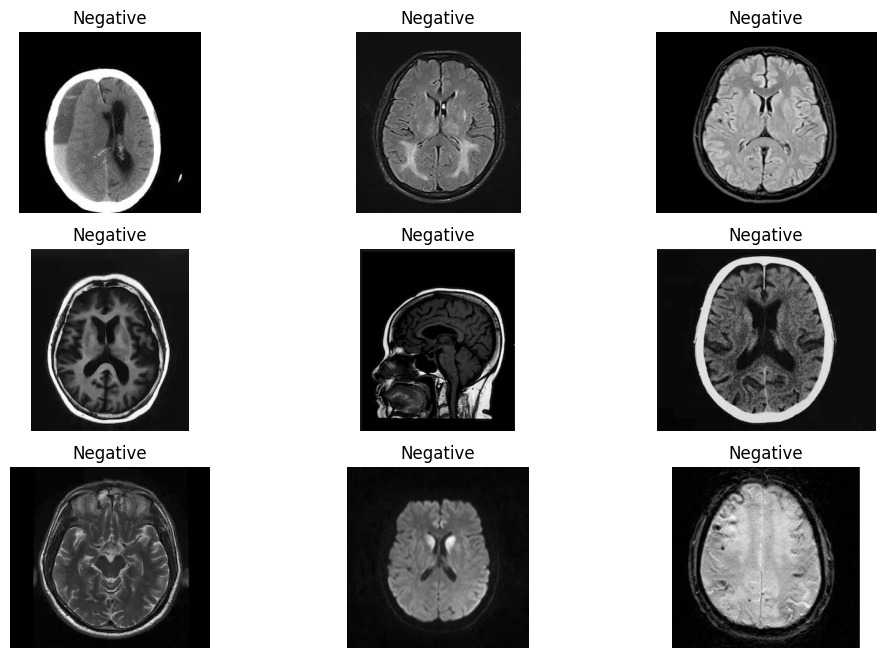

In [52]:
plt.figure(figsize=(12,8))
p = os.listdir(r'D:\MY PC DATA\Desktop\My Projects\TumorSense\Dataset\Testing')
c=1
for i in os.listdir(r'D:\MY PC DATA\Desktop\My Projects\TumorSense\Dataset\Testing\no_tumor')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'D:\MY PC DATA\Desktop\My Projects\TumorSense\Dataset\Testing\no_tumor'+'/'+i,0)
    if img is None:
        print('Wrong path:', path)
    else:
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        p = sv.predict(img1)
        plt.title(neg_or_pos[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        c+=1

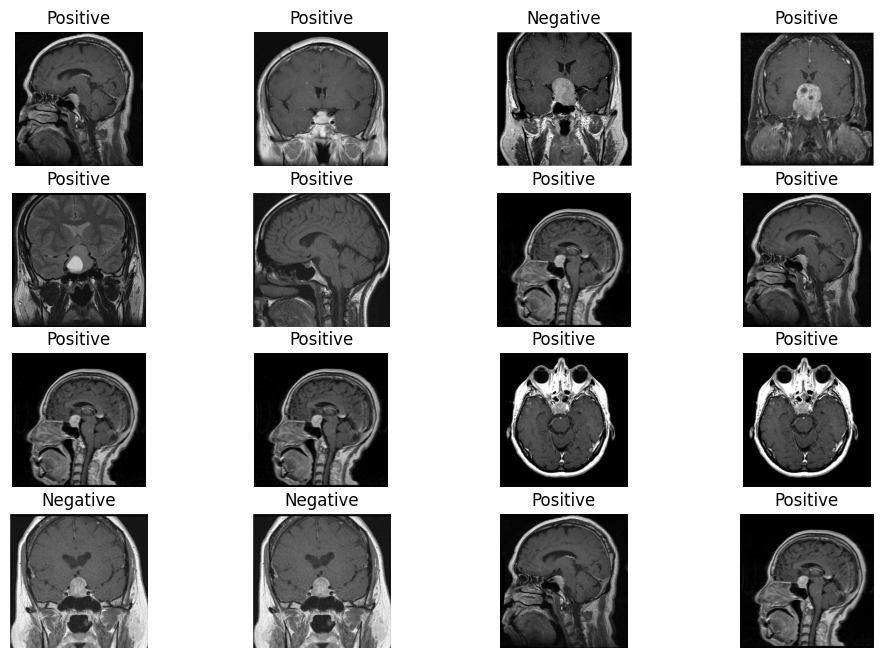

In [54]:
plt.figure(figsize=(12,8))
p = os.listdir(r'D:\MY PC DATA\Desktop\My Projects\TumorSense\Dataset\Testing')
c=1
for i in os.listdir(r"D:\MY PC DATA\Desktop\My Projects\TumorSense\Dataset\Testing\pituitary_tumor")[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread(r"D:\MY PC DATA\Desktop\My Projects\TumorSense\Dataset\Testing\pituitary_tumor"+'/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(neg_or_pos[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

The code effectively creates a visualization of the test images with predicted classifications, providing insight into how the model performs on unseen data.

### Conclusion

In this project, we embarked on a journey to develop a brain tumor classification system using machine learning techniques. We explored various steps, from data preprocessing and feature scaling to model training and testing. Leveraging tools like scikit-learn, OpenCV, and Matplotlib, we transformed raw MRI image data into a format suitable for training and evaluation.

Through training and testing, we were able to build and assess models like Support Vector Classifier (SVC) and Logistic Regression for brain tumor classification. The visualizations and metrics obtained during testing provided insights into the models' performance, highlighting their ability to generalize to new data.

Overall, this project demonstrates the power of machine learning in healthcare, offering a potential solution to aid medical professionals in the accurate identification of brain tumors from MRI scans. Future work may involve exploring more advanced models, fine-tuning hyperparameters, and expanding the dataset to enhance the model's performance further.

By combining domain knowledge, technical skills, and a passion for innovation, we've taken a step forward in addressing real-world challenges using machine learning techniques.
